# Heart Attack Prediction using Random Forest Classifier

# Project Description

This notebook demonstrates the development of a machine learning model to predict the likelihood of heart attack occurrences based on various health, lifestyle, and clinical features. It includes data preprocessing, handling class imbalance, multiple training experiments, hyperparameter tuning using GridSearchCV, and final model evaluation.

# Data Preprocessing

**Description:**

Load the dataset, check for null values, encode categorical variables if any, and prepare the data for modeling. This includes separating features and the target variable.

In [81]:
import pandas as pd

# Load dataset
df = pd.read_csv('heart_attack_prediction_indonesia.csv') 

In [82]:
# Inspect dataset
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [85]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [87]:
#Check all columns

df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

In [89]:
# Check missing values
print(df.isnull().sum())

age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


In [91]:
# Convert None values into Non-Alcholic 
df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Non-Alcoholic')

In [93]:
# Checking correctly replace the Non-Alcholic
print(df['alcohol_consumption'])

0         Non-Alcoholic
1         Non-Alcoholic
2              Moderate
3              Moderate
4              Moderate
              ...      
158350    Non-Alcoholic
158351    Non-Alcoholic
158352         Moderate
158353    Non-Alcoholic
158354    Non-Alcoholic
Name: alcohol_consumption, Length: 158355, dtype: object


In [95]:
# Summary statistics for numerical columns
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [99]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Label Encoding for ordered categories
label_cols = [
    'income_level',
    'smoking_status',
    'physical_activity',
    'air_pollution_exposure',
    'stress_level'
]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [101]:
#One-Hot Encoding for nominal categories
one_hot_cols = ['gender', 'region', 'dietary_habits', 'EKG_results']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [103]:
#Manual Encoding the alcohol_consumption
alcohol_mapping = {'Non-Alcoholic': 0, 'Moderate': 1, 'High': 2}
df['alcohol_consumption'] = df['alcohol_consumption'].map(alcohol_mapping)

In [105]:
#het first 5 raws to check encoding is correctly applied
df.head()

,age,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,...,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack,gender_Male,region_Urban,dietary_habits_Unhealthy,EKG_results_Normal
0,60,2,0,1,211,0,83,0,1,0,...,121,101,0,0,0,0,True,False,True,True
1,53,1,0,0,208,0,106,1,2,0,...,83,138,1,0,1,0,False,True,False,True
2,62,1,0,0,231,1,112,1,2,1,...,130,171,0,1,0,1,False,True,False,False
3,73,1,1,0,202,0,82,1,1,1,...,85,146,0,1,1,0,True,True,True,True
4,52,2,1,0,232,0,89,0,0,1,...,127,139,1,0,1,1,True,True,True,True


In [107]:
# Check class distribution
print(df['heart_attack'].value_counts())

heart_attack
0    94854
1    63501
Name: count, dtype: int64


# Split the Testing and Training set

In [109]:
#Split the Testing and Training set

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['heart_attack'])
y = df['heart_attack']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (126684, 27)
Testing set size: (31671, 27)


# Data Visualization

Data visualization before training to understand the dataset its patterns, distributions and relationships

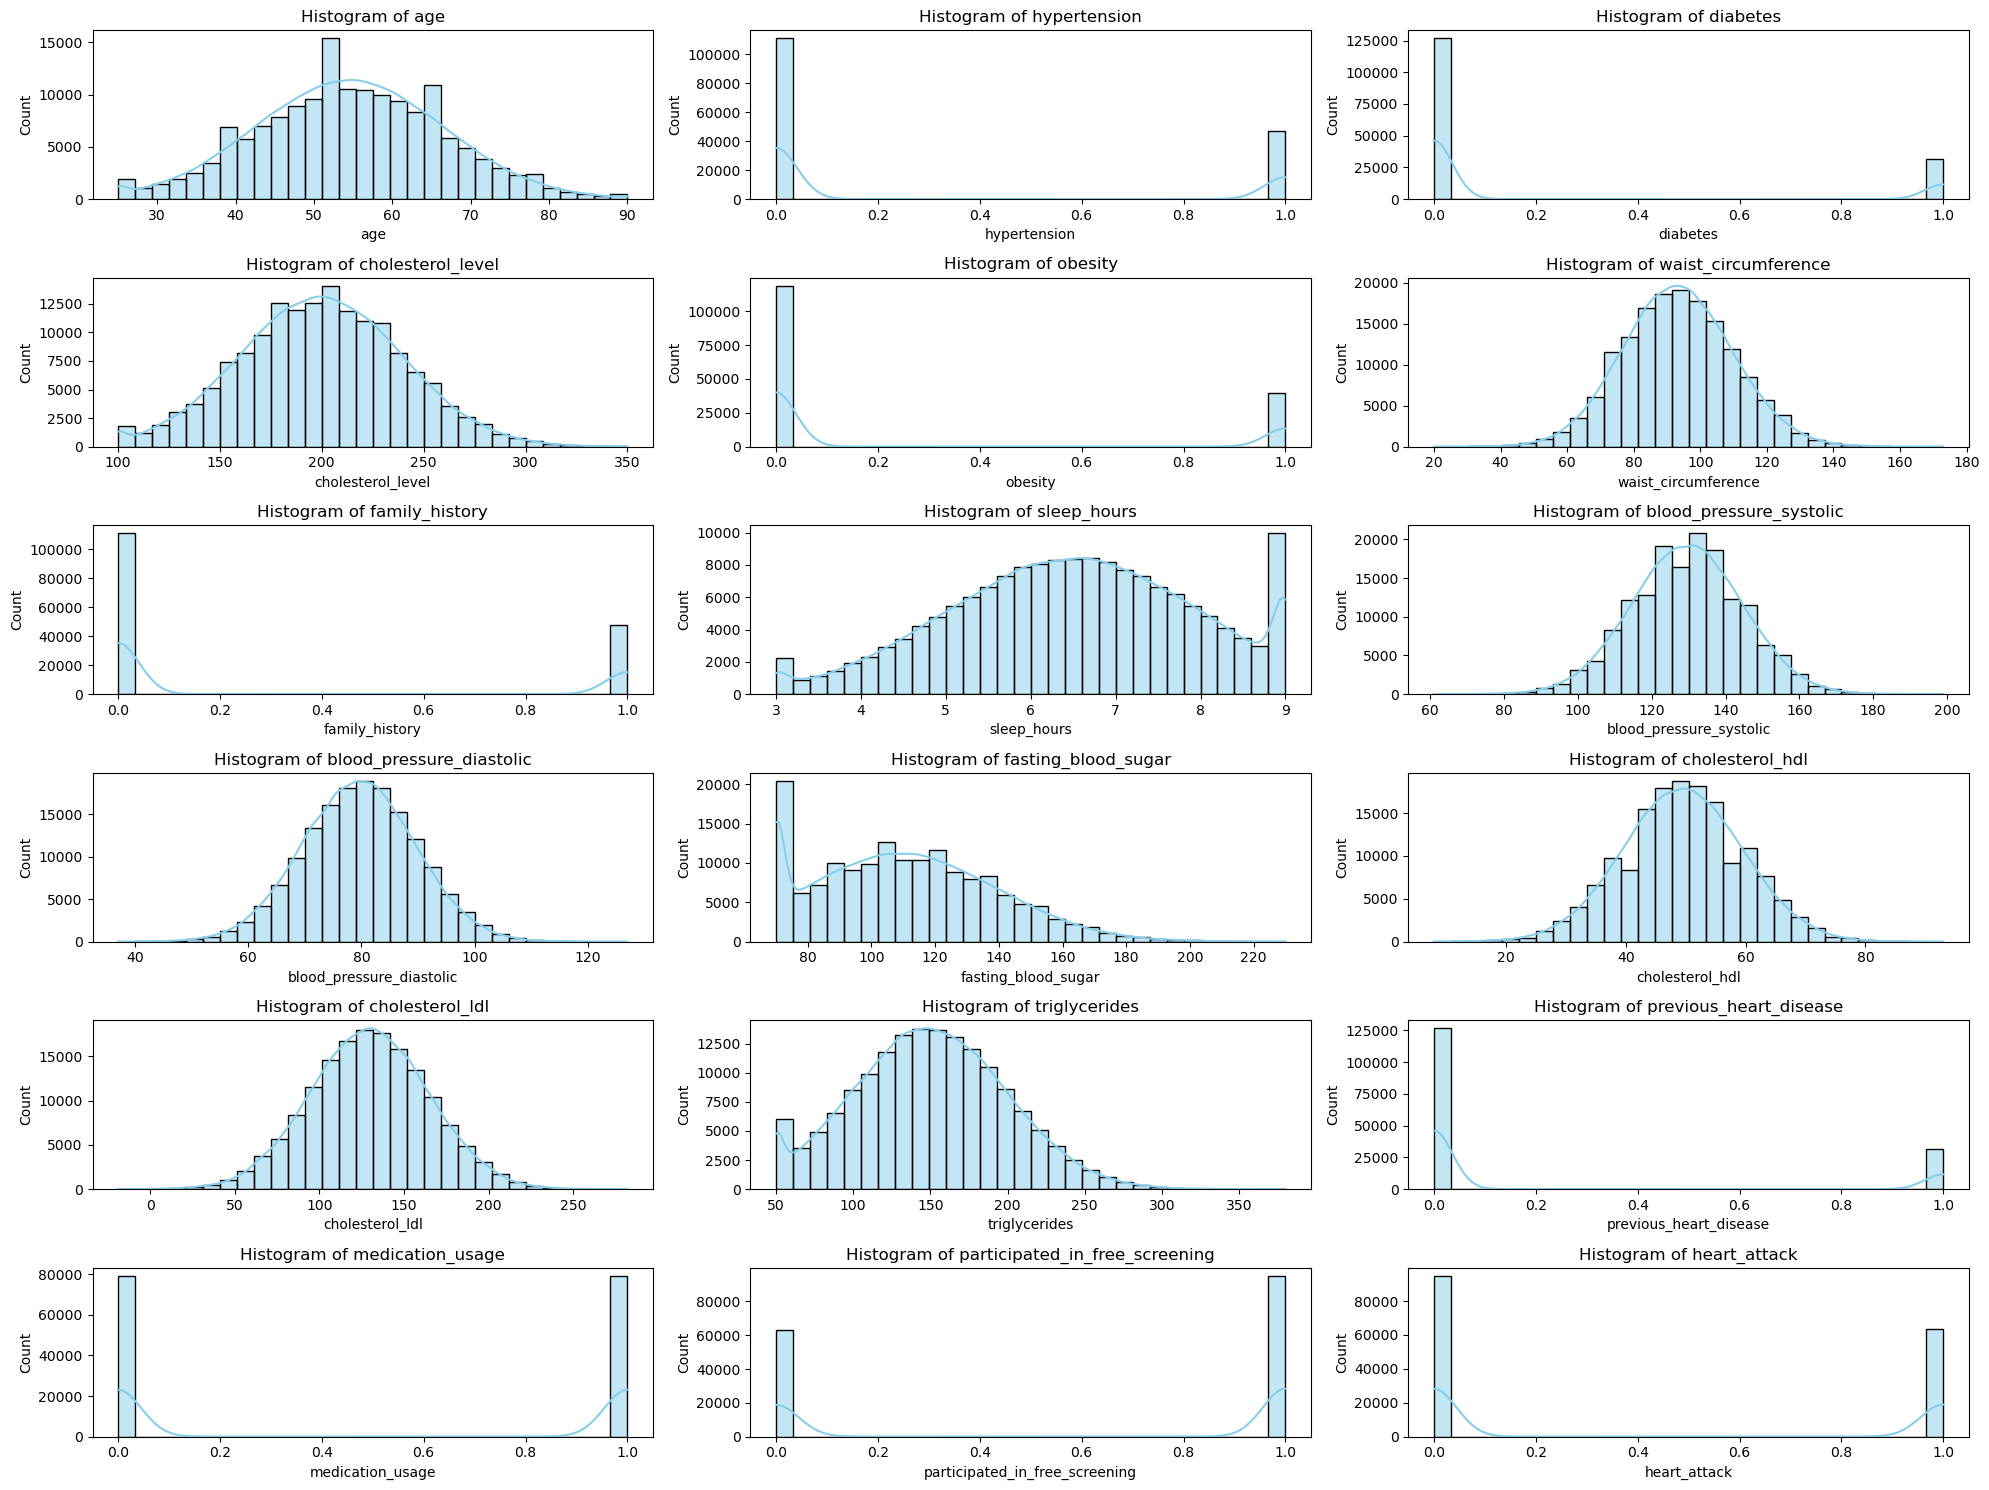

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

df_visualize = pd.read_csv('heart_attack_prediction_indonesia.csv') 

# Select only numerical columns
num_cols = df_visualize .select_dtypes(include=['int64', 'float64']).columns

# Plot histograms in a grid
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot((len(num_cols) + 2) // 3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()

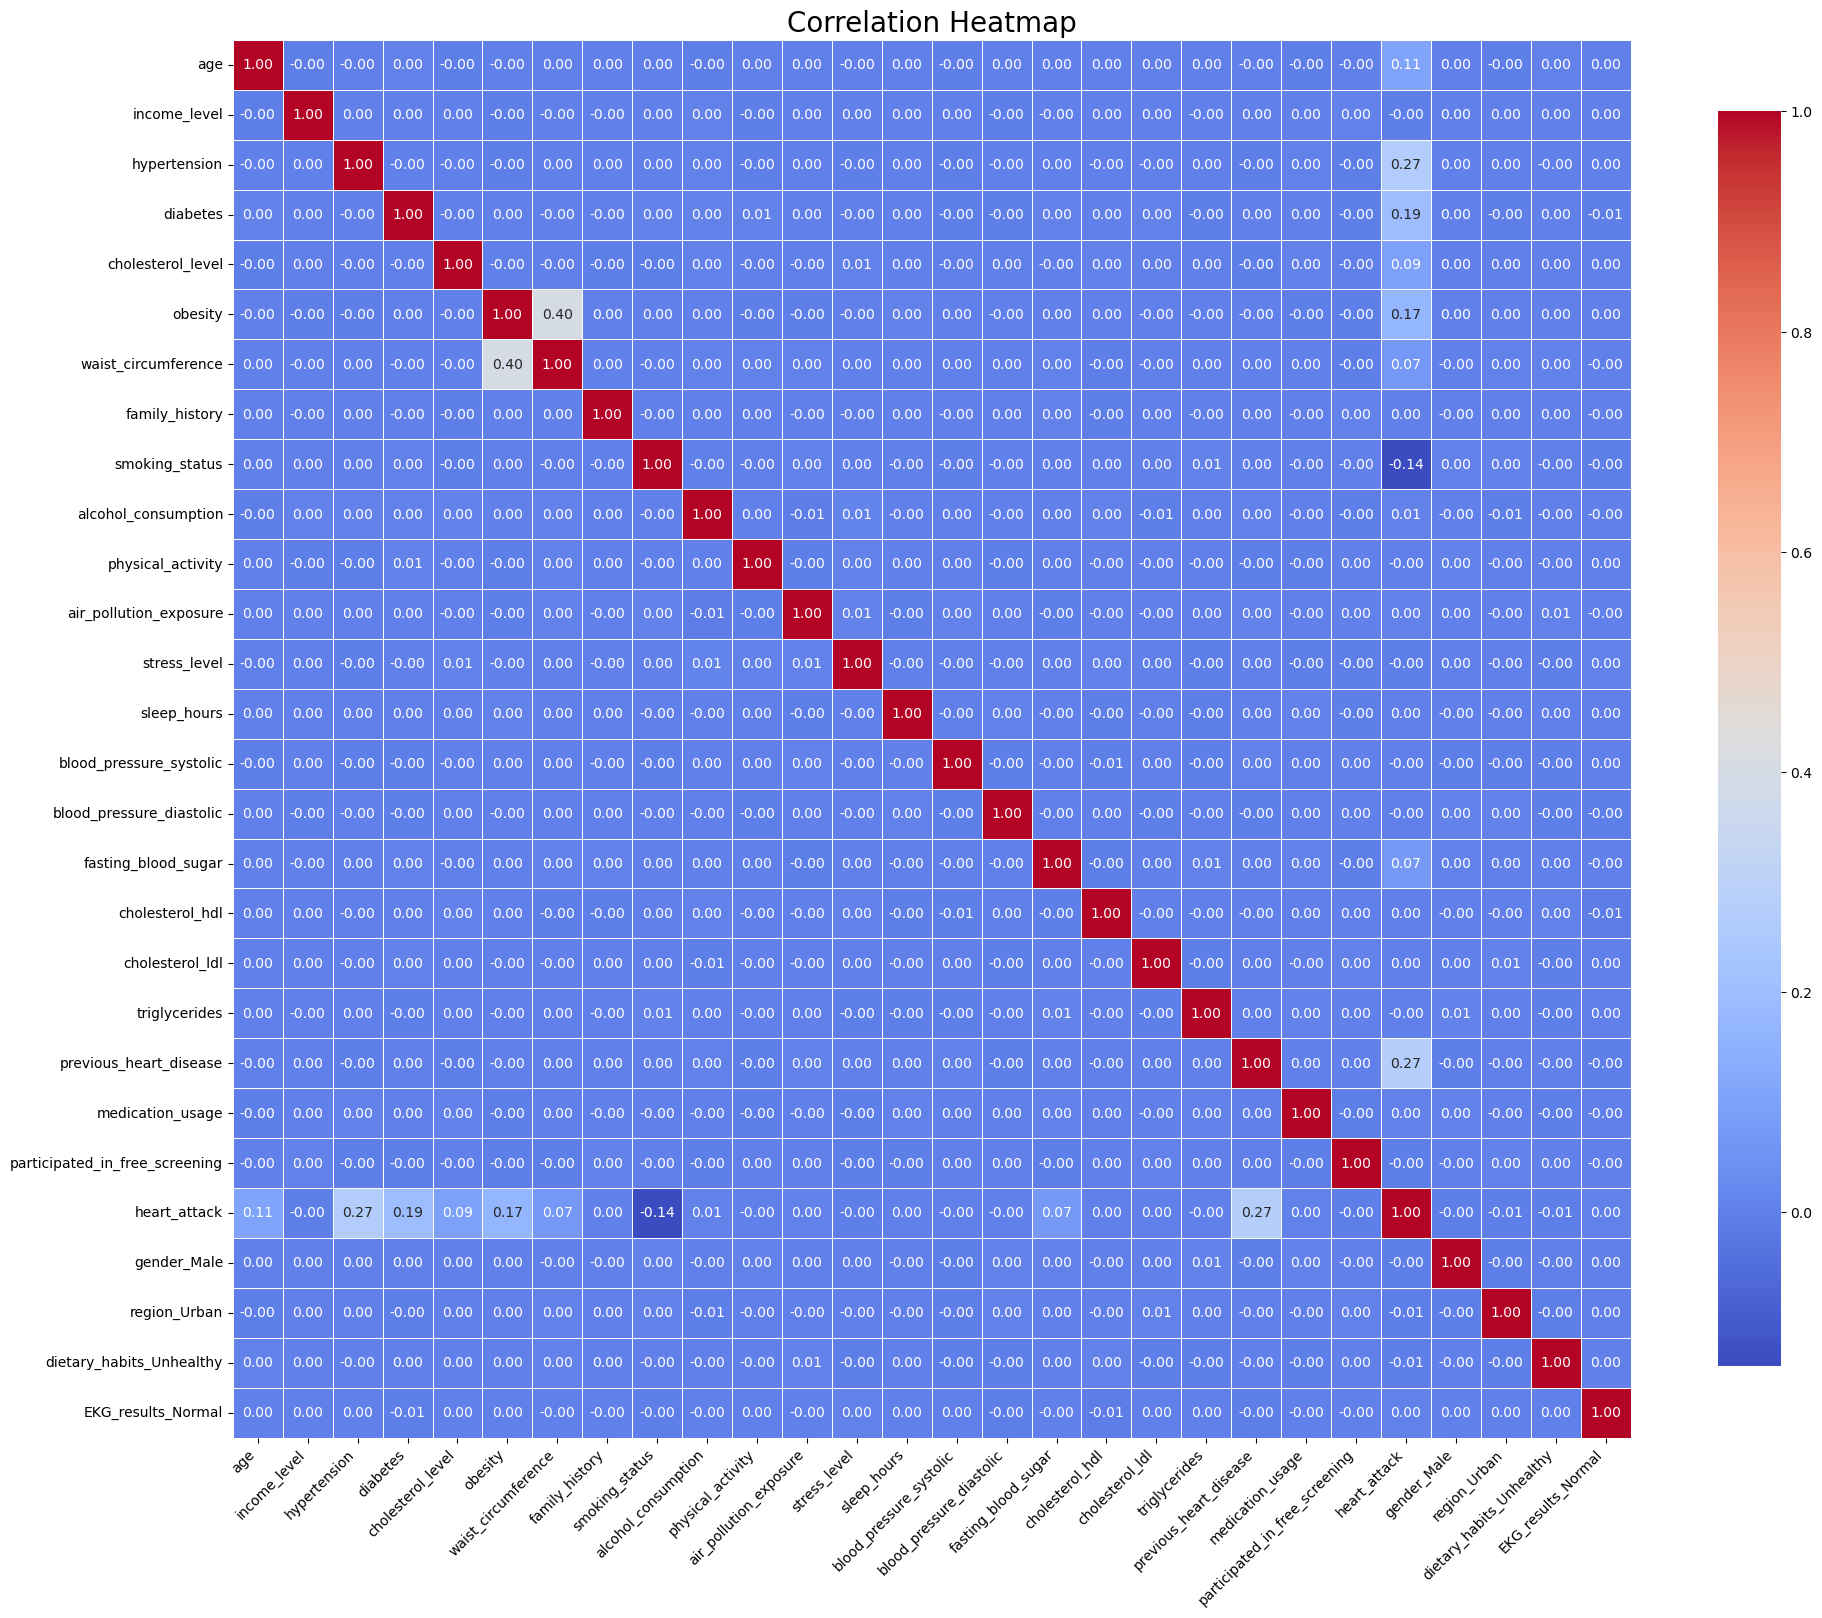

In [291]:

plt.figure(figsize=(20, 18))  
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,       
    linewidths=0.5,     
    cbar_kws={"shrink": 0.75}  
)

plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

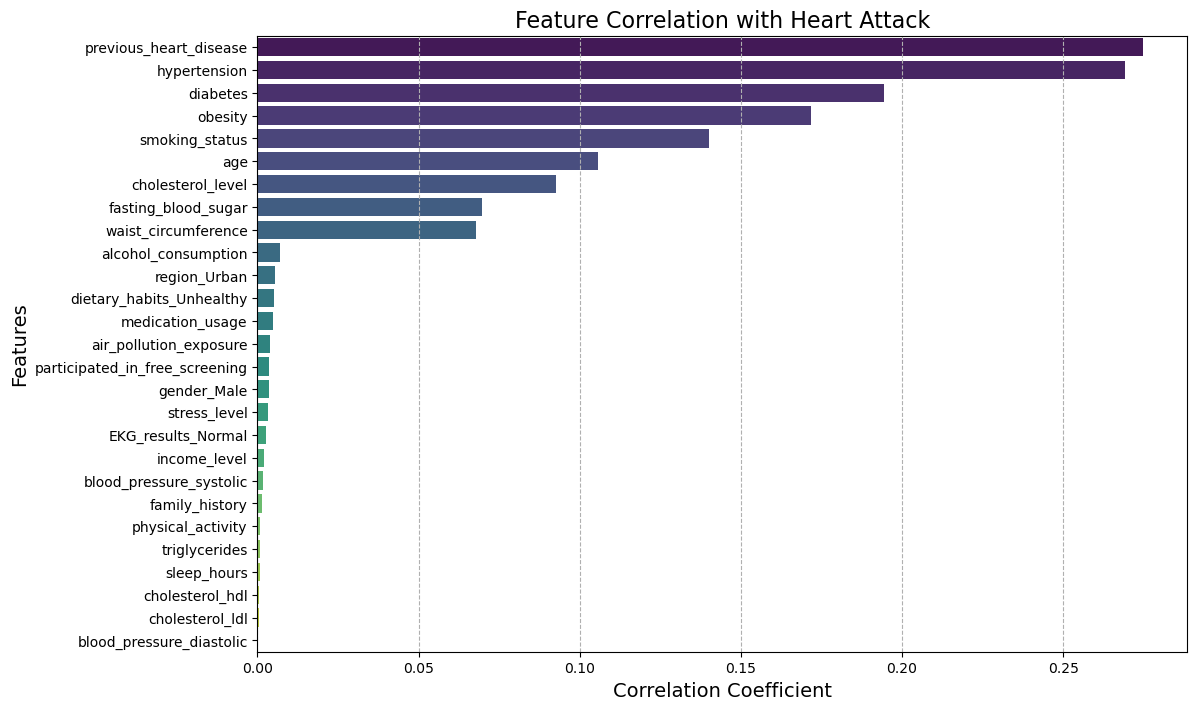

In [292]:
# Calculate correlations only with 'heart_attack'
target_corr = df.corr()['heart_attack'].drop('heart_attack')  # Drop self-correlation (1.0)

# Sort by absolute correlation value
target_corr = target_corr.abs().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis', hue=target_corr.index)
plt.title('Feature Correlation with Heart Attack', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--')
plt.show()

# Train the Model

# Experiment 1 – Baseline Random Forest Classifier (Imbalanced Data and default hyperparameters) 

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib


model = RandomForestClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.7293


In [118]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     18971
           1       0.69      0.60      0.64     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



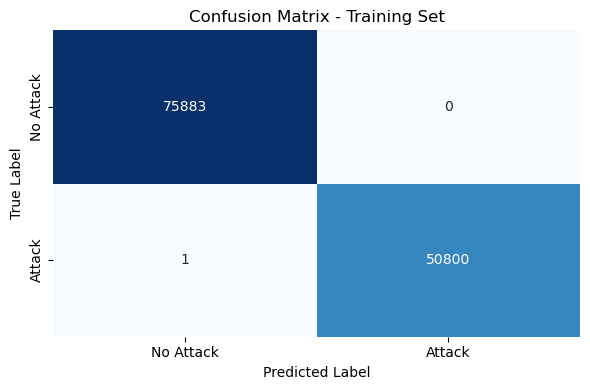

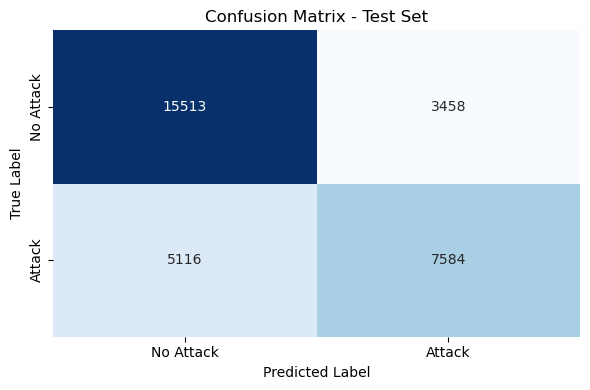

In [120]:
# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
# Confusion Matrix Heatmaps
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(train_cm, "Confusion Matrix - Training Set")
plot_conf_matrix(test_cm, "Confusion Matrix - Test Set")



In [122]:
# Feature importance for Random Forest
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importances)


Feature Importances:
                           Feature  Importance
4                cholesterol_level    0.077347
20          previous_heart_disease    0.074946
2                     hypertension    0.071947
0                              age    0.067884
16             fasting_blood_sugar    0.065333
13                     sleep_hours    0.061725
19                   triglycerides    0.060032
18                 cholesterol_ldl    0.059587
6              waist_circumference    0.056410
14         blood_pressure_systolic    0.055927
17                 cholesterol_hdl    0.053145
15        blood_pressure_diastolic    0.053080
3                         diabetes    0.037355
8                   smoking_status    0.035376
5                          obesity    0.027507
10               physical_activity    0.016164
1                     income_level    0.015720
11          air_pollution_exposure    0.015442
12                    stress_level    0.015155
9              alcohol_consumption    

# Experiment 2 – Class-Weighted  Model

In [318]:
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.7268


In [319]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))



Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     18971
           1       0.69      0.57      0.63     12700

    accuracy                           0.73     31671
   macro avg       0.72      0.70      0.71     31671
weighted avg       0.72      0.73      0.72     31671



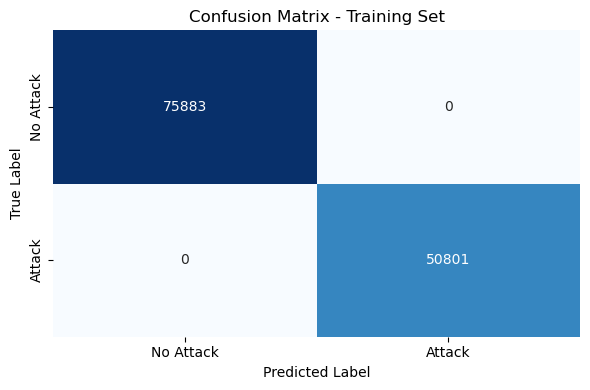

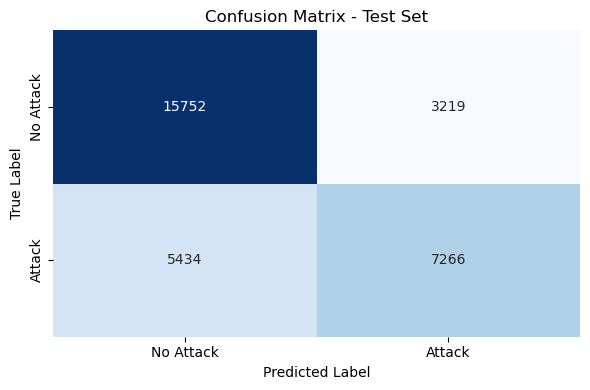

In [320]:
# Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix Heatmaps
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(train_cm, "Confusion Matrix - Training Set")
plot_conf_matrix(test_cm, "Confusion Matrix - Test Set")


In [133]:
# Feature importance for Random Forest
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importances)



Feature Importances:
                           Feature  Importance
4                cholesterol_level    0.077357
20          previous_heart_disease    0.074746
2                     hypertension    0.074081
0                              age    0.068945
16             fasting_blood_sugar    0.065438
13                     sleep_hours    0.061372
19                   triglycerides    0.059412
18                 cholesterol_ldl    0.059144
6              waist_circumference    0.055899
14         blood_pressure_systolic    0.054993
15        blood_pressure_diastolic    0.052860
17                 cholesterol_hdl    0.052584
3                         diabetes    0.038603
8                   smoking_status    0.036723
5                          obesity    0.029377
10               physical_activity    0.015616
1                     income_level    0.015253
11          air_pollution_exposure    0.015205
12                    stress_level    0.015001
9              alcohol_consumption    

# Experiment 3: SMOTE Oversampling

In [312]:


# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print class distribution to verify SMOTE balancing
print("\nClass distribution before SMOTE (training set):")
print(y_train.value_counts())
print("\nClass distribution after SMOTE (training set):")
print(y_train_smote.value_counts())



Class distribution before SMOTE (training set):
heart_attack
0    75883
1    50801
Name: count, dtype: int64

Class distribution after SMOTE (training set):
heart_attack
0    75883
1    75883
Name: count, dtype: int64


In [308]:
# Train Random Forest model on SMOTE data
model = RandomForestClassifier(
    max_depth=5,
     min_samples_split=5,  
    min_samples_leaf=5,  
    random_state=42,
    class_weight='balanced' 
)
model.fit(X_train_smote, y_train_smote)

# Predictions
y_train_pred = model.predict(X_train_smote)
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")




Training Accuracy: 0.6819
Testing Accuracy: 0.6998


In [310]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))




Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     18971
           1       0.61      0.68      0.65     12700

    accuracy                           0.70     31671
   macro avg       0.69      0.70      0.69     31671
weighted avg       0.71      0.70      0.70     31671



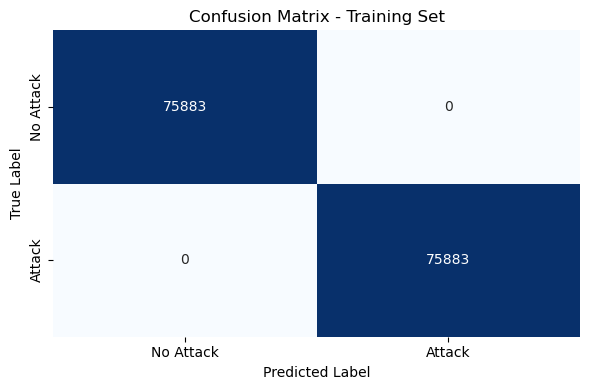

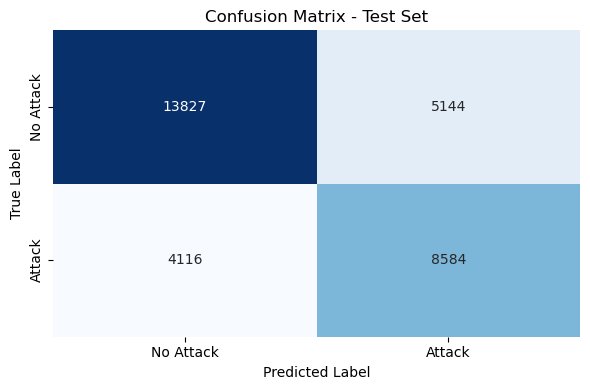

In [142]:
# Confusion Matrices
train_cm = confusion_matrix(y_train_smote, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Confusion Matrix Heatmaps
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(train_cm, "Confusion Matrix - Training Set")
plot_conf_matrix(test_cm, "Confusion Matrix - Test Set")



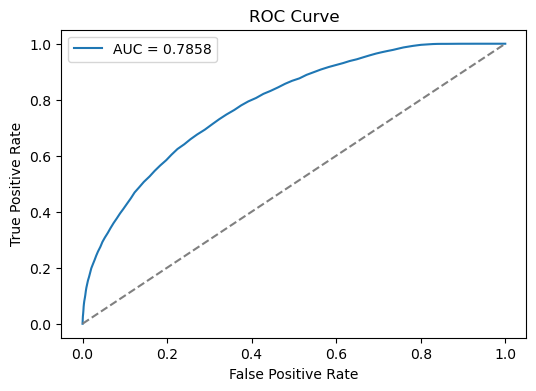

In [144]:
# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [146]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importances)




Feature Importances:
                           Feature  Importance
4                cholesterol_level    0.080392
0                              age    0.069969
16             fasting_blood_sugar    0.067889
13                     sleep_hours    0.066508
19                   triglycerides    0.063558
18                 cholesterol_ldl    0.062915
6              waist_circumference    0.060478
14         blood_pressure_systolic    0.059522
8                   smoking_status    0.057128
15        blood_pressure_diastolic    0.056684
17                 cholesterol_hdl    0.056442
20          previous_heart_disease    0.040834
2                     hypertension    0.039366
10               physical_activity    0.020403
12                    stress_level    0.019527
11          air_pollution_exposure    0.019503
1                     income_level    0.019063
3                         diabetes    0.018671
9              alcohol_consumption    0.016854
5                          obesity    

# Experiment 4 - Training with Downsampled Data

In [149]:


# Downsample the training set
# Combine X_train and y_train into a single DataFrame for downsampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in training set
train_majority = train_df[train_df['heart_attack'] == 0]
train_minority = train_df[train_df['heart_attack'] == 1]

# Downsample majority class to match minority class size
train_majority_downsampled = resample(
    train_majority,
    replace=False,  # Sample without replacement
    n_samples=len(train_minority),  # Match minority class size
    random_state=42  # For reproducibility
)

# Combine minority class with downsampled majority class
train_downsampled = pd.concat([train_majority_downsampled, train_minority])

# Shuffle the dataset
train_downsampled = train_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target for training
X_train_downsampled = train_downsampled.drop(columns=['heart_attack'])
y_train_downsampled = train_downsampled['heart_attack']

# Print class distribution to verify balance
print("\nClass distribution after downsampling (training set):")
print(y_train_downsampled.value_counts())




Class distribution after downsampling (training set):
heart_attack
0    50801
1    50801
Name: count, dtype: int64


In [151]:
# Train Random Forest model on downsampled data
model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_downsampled, y_train_downsampled)

# Predict
y_train_pred = model.predict(X_train_downsampled)
y_test_pred = model.predict(X_test)

# Evaluate Accuracy
train_acc = accuracy_score(y_train_downsampled, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")




Training Accuracy: 1.0000
Testing Accuracy: 0.7153


In [153]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))




Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.80      0.70      0.75     18971
           1       0.62      0.74      0.67     12700

    accuracy                           0.72     31671
   macro avg       0.71      0.72      0.71     31671
weighted avg       0.73      0.72      0.72     31671




Confusion Matrix (Test Set):


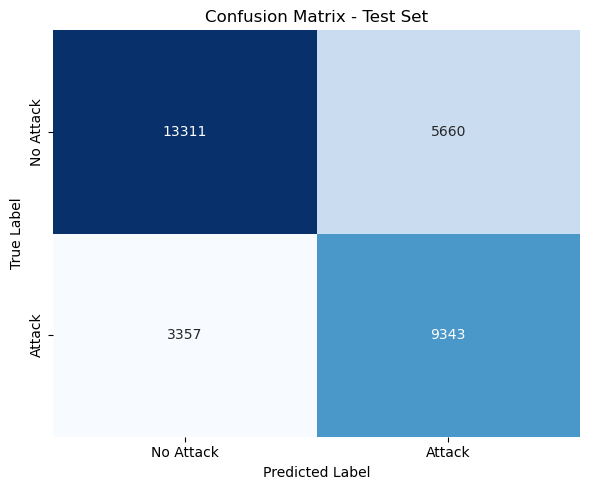

In [157]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")


# Plot Confusion Matrix
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Attack', 'Attack'],
                yticklabels=['No Attack', 'Attack'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_conf_matrix(conf_matrix, "Confusion Matrix - Test Set")



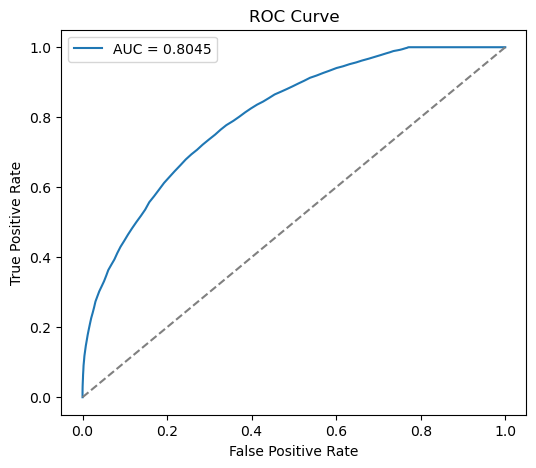

In [159]:
# ROC Curve
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [160]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importances)


Feature Importance:
                           Feature  Importance
4                cholesterol_level    0.077250
20          previous_heart_disease    0.074699
2                     hypertension    0.074579
0                              age    0.068858
16             fasting_blood_sugar    0.066001
13                     sleep_hours    0.061077
19                   triglycerides    0.059179
18                 cholesterol_ldl    0.059023
6              waist_circumference    0.055541
14         blood_pressure_systolic    0.054697
15        blood_pressure_diastolic    0.052656
17                 cholesterol_hdl    0.052257
3                         diabetes    0.038614
8                   smoking_status    0.037132
5                          obesity    0.028925
10               physical_activity    0.015813
11          air_pollution_exposure    0.015510
1                     income_level    0.015282
12                    stress_level    0.015016
9              alcohol_consumption    0

# Experiment 5 : Manually Tuned Random Forest (SMOTE-Balanced)

In [273]:
# Train Random Forest model on SMOTE data
model = RandomForestClassifier(
    n_estimators=100,  
    max_depth=5,      
    min_samples_split=5,  
    min_samples_leaf=5,    
    class_weight='balanced',
    random_state=42
)
model.fit(X_train_smote, y_train_smote)

# Predict
y_train_pred = model.predict(X_train_smote)
y_test_pred = model.predict(X_test)

# Evaluate Accuracy
train_acc = accuracy_score(y_train_smote, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")



Training Accuracy: 0.7038
Testing Accuracy: 0.7133


In [275]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     18971
           1       0.62      0.72      0.67     12700

    accuracy                           0.71     31671
   macro avg       0.71      0.71      0.71     31671
weighted avg       0.72      0.71      0.72     31671




Confusion Matrix:



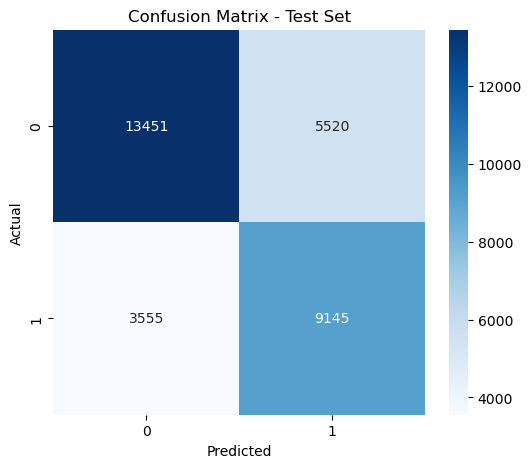

In [265]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n")

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



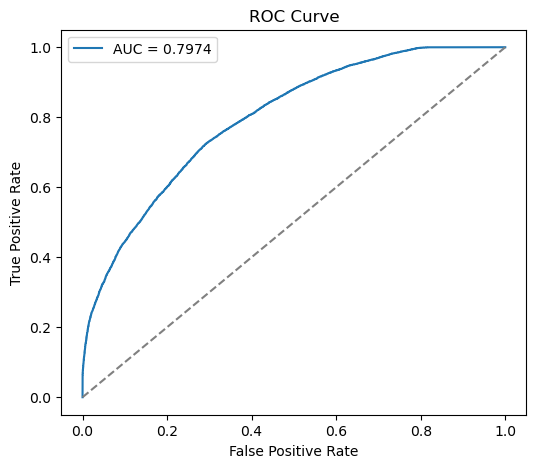

In [174]:
# ROC Curve
y_test_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [176]:
# Feature importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importances)



Feature Importance:
                            Feature  Importance
8                   smoking_status    0.222249
20          previous_heart_disease    0.172359
2                     hypertension    0.159418
4                cholesterol_level    0.078372
0                              age    0.068702
3                         diabetes    0.053378
5                          obesity    0.041104
16             fasting_blood_sugar    0.033610
12                    stress_level    0.021026
22  participated_in_free_screening    0.014799
24                    region_Urban    0.014657
10               physical_activity    0.014429
1                     income_level    0.014199
25        dietary_habits_Unhealthy    0.013658
7                   family_history    0.013572
11          air_pollution_exposure    0.011690
23                     gender_Male    0.011182
21                medication_usage    0.008935
26              EKG_results_Normal    0.006800
6              waist_circumference    

# Experiment 6 – Hyperparameter Tuning with GridSearchCV(Final Best Model)

In [279]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 7,  9, 15, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [5, 7, 9, 11]
}

base_model = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train_smote, y_train_smote)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict
y_train_pred = best_model.predict(X_train_smote)
y_test_pred = best_model.predict(X_test)

# Evaluate
train_acc = accuracy_score(y_train_smote, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")



Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'n_estimators':150 ,'max_depth': 9, 'min_samples_leaf': 20, 'min_samples_split': 9}
Training Accuracy: 0.7235
Testing Accuracy: 0.7146


In [281]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))




Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75     18971
           1       0.63      0.72      0.67     12700

    accuracy                           0.71     31671
   macro avg       0.71      0.72      0.71     31671
weighted avg       0.72      0.71      0.72     31671




Confusion Matrix:
 [[13504  5467]
 [ 3572  9128]]


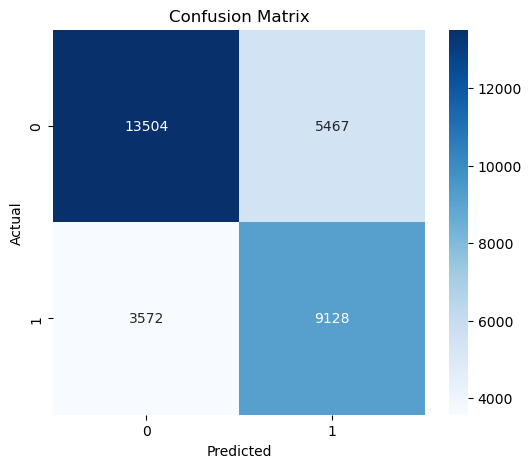

In [283]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



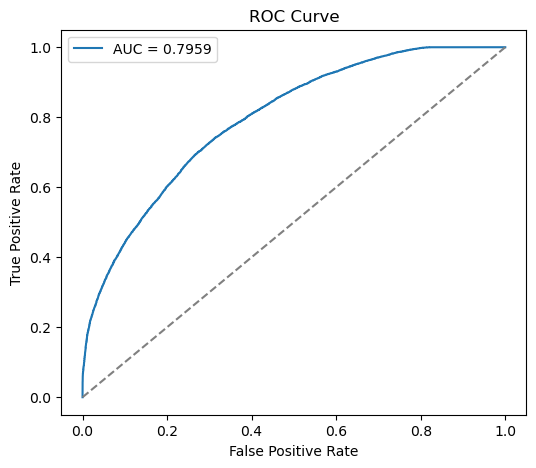

In [285]:
# ROC Curve
y_test_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



In [287]:
# Feature Importance
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", importances)



Feature Importance:
                            Feature  Importance
8                   smoking_status    0.159105
20          previous_heart_disease    0.123612
2                     hypertension    0.117857
4                cholesterol_level    0.075974
0                              age    0.066603
3                         diabetes    0.045674
16             fasting_blood_sugar    0.044601
5                          obesity    0.034497
13                     sleep_hours    0.024450
6              waist_circumference    0.023931
12                    stress_level    0.021468
19                   triglycerides    0.021262
18                 cholesterol_ldl    0.021034
14         blood_pressure_systolic    0.019446
10               physical_activity    0.018543
15        blood_pressure_diastolic    0.018534
17                 cholesterol_hdl    0.018457
1                     income_level    0.017635
24                    region_Urban    0.016890
22  participated_in_free_screening    